In [43]:
### Random Seed
from numpy.random import seed
seed(1)

In [44]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import csv

In [45]:
df = pd.read_csv('belt_sensor_all.csv')
print(df.shape)
df.head(2)

(108170, 22)


,Unnamed: 0,Pid,timestamp,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,...,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,0,P1_BS,3.00,-84.23,-994.63,8.06,-0.37,-2.62,1.65,311.28,...,2.08,-3.23,-4.33,-68.12,-970.46,150.15,1.83,0.24,0.61,Downstairs
1,1,P1_BS,3.01,-86.43,-1004.15,16.85,-0.18,-3.17,0.85,301.76,...,6.77,3.05,-3.78,-73.24,-978.52,140.62,0.55,-0.24,0.31,Downstairs


In [46]:
df.groupby('Pid').size()

Pid
P1_BS            12278
P2_BS            13016
P3_BS            13016
P4_BS            12946
P5_BS            13016
p10_all_BS123     8825
p11_all_BS123     8598
p6_all_BS123      8825
p7_all_BS123      8825
p8_all_BS123      8825
dtype: int64

In [47]:
### Low Pass filter 
from scipy import signal
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [48]:
#low pass filter
lowpass_filtred=[]
dfm=df[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
for column in dfm.columns:# iterate over each column in raw_df
    cutoff_frequency = 15.0
    sample_rate=100
    t_signal=np.array(dfm[column]) #copie the signal values in 1D numpy array
    y = butter_lowpass_filter(t_signal,cutoff_frequency,sample_rate/2) 
    lowpass_filtred.append(y)
lowpass=pd.DataFrame(lowpass_filtred)
lowpass=lowpass.T
lowpass.columns=['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']
df1=df[['Pid','timestamp']]
df_filtred=pd.concat([df1,lowpass],axis=1)
df_filtred['Label']=df['Label']

In [49]:
df_filtred['Label'].value_counts()

Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64

Class Counts:
 Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64


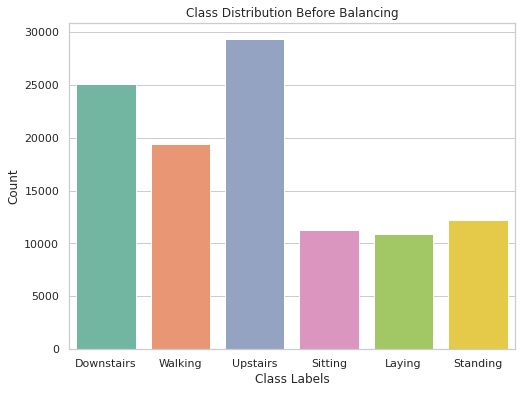

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_filtred['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_filtred, palette="Set2")
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [51]:
from imblearn.over_sampling import SMOTE
# split data into input and output elements
X = df_filtred[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy',
       'S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = df_filtred[['Label']]

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

df_Smoted=pd.concat([Xo,yo],axis=1)
print(df_Smoted.shape)
df_Smoted.head(2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14a447e69f70>
Traceback (most recent call last):
  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback

(176070, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs


Class Counts:
 Downstairs    29345
Walking       29345
Upstairs      29345
Sitting       29345
Laying        29345
Standing      29345
Name: Label, dtype: int64


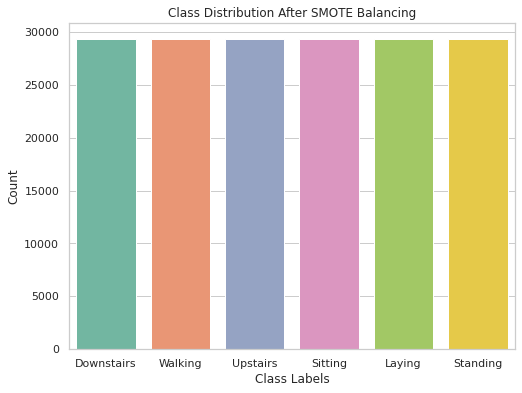

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_Smoted['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_Smoted, palette="Set2")
plt.title('Class Distribution After SMOTE Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [53]:
df_Smoted['Label_id']=df_Smoted['Label']
dff=df_Smoted.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
dff.head(2)

,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label,Label_id
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs,0
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs,0


In [54]:
# Label encoding
df_filtred['Label_id']=df_filtred['Label']
dff=df_filtred.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
## Normalize/Standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = dff[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = dff['Label_id']
scaler = StandardScaler()
dx = scaler.fit_transform(X)

df_scaled = pd.DataFrame(data = dx, columns = X.columns)
df_scaled['Label_id'] = y.values

print(df_scaled.shape)
df_scaled.tail(2)

(108170, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label_id
108168,-1.184801,-1.246834,1.052031,-1.358904,1.442018,0.213337,-0.374825,0.984964,0.103477,-0.647672,0.728023,0.554009,-0.495231,-0.095276,0.177837,0.934893,3.810924,-1.627844,5
108169,-0.948608,-2.459766,0.808399,-2.407089,1.100033,0.209530,-0.625947,0.657764,0.264402,-0.508701,1.039492,0.488135,-0.641922,-0.120628,0.178026,0.853266,3.767479,-1.420029,5


In [55]:
## Segmentation (window Preparation)
import scipy.stats as stats
Fs = 100
segment_size = 570 # fs*3 # window size=n_time steps=frame size
step_size = 50  #  Fs/2 # step size is related to window overlap
n_features = 18
def get_segments(df, segment_size, step_size):

    segments = []
    labels = []
    
    for i in range(0, len(df) - segment_size - 1, step_size):
        S1Ax = df_scaled['S1_Ax'].values[i: i + segment_size]
        S1Ay = df_scaled['S1_Ay'].values[i: i + segment_size]
        S1Az = df_scaled['S1_Az'].values[i: i + segment_size]
        S1Gx = df_scaled['S1_Gx'].values[i: i + segment_size]
        S1Gy = df_scaled['S1_Gy'].values[i: i + segment_size]
        S1Gz = df_scaled['S1_Gz'].values[i: i + segment_size]
        
        S2Ax = df_scaled['S2_Ax'].values[i: i + segment_size]
        S2Ay = df_scaled['S2_Ay'].values[i: i + segment_size]
        S2Az = df_scaled['S2_Az'].values[i: i + segment_size]
        S2Gx = df_scaled['S2_Gx'].values[i: i + segment_size]
        S2Gy = df_scaled['S2_Gy'].values[i: i + segment_size]
        S2Gz = df_scaled['S2_Gz'].values[i: i + segment_size]
        
        
        S3Ax = df_scaled['S3_Ax'].values[i: i + segment_size]
        S3Ay = df_scaled['S3_Ay'].values[i: i + segment_size]
        S3Az = df_scaled['S3_Az'].values[i: i + segment_size]
        S3Gx = df_scaled['S3_Gx'].values[i: i + segment_size]
        S3Gy = df_scaled['S3_Gy'].values[i: i + segment_size]
        S3Gz = df_scaled['S3_Gz'].values[i: i + segment_size]
        
          # Retrieve the most often used label in this segment
        # label = stats.mode(df_scaled['Label_id'][i: i + segment_size])[0][0] ## [0][0] shows the current sequence
        label = np.unique(df_scaled['Label_id'][i: i + segment_size])[0]

        #We used the dstack() to ensure that each array is stacked in such a way that
        #the features are separated in the third dimension, as we would prefer.
        segments.append(np.dstack([S1Ax, S1Ay, S1Az,S1Gx,S1Gy,S1Gz,S2Ax,S2Ay,S2Az, S2Gx,S2Gy,S2Gz,S3Ax,S3Ay,S3Az,S3Gx,S3Gy,S3Gz]))
        labels.append(label)

    # Bring the segments into a better shape
    segments=np.asarray(segments, dtype= np.float32).reshape(-1, segment_size, n_features)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
        
    return segments, labels


In [56]:
X, y = get_segments(df_scaled, segment_size, step_size)

In [57]:
X.shape,y.shape, y.shape[0]

((2152, 570, 18), (2152, 6), 2152)

In [58]:
# # reshape data into time steps of sub-sequences

# n_steps, n_length = 10, 50
# df_X = X.reshape((X.shape[0], n_steps, n_length, n_features))
# n_outputs = y.shape[1] #n_outputs= 6

In [59]:
from sklearn.model_selection import train_test_split
# split data into training set and test set
X_train_main, X_test, y_train_main, y_test = train_test_split(X, y,test_size=0.15, random_state=42)

# split training set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_main,y_train_main,test_size=0.15,random_state=42)

In [60]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("y_valid",y_valid.shape)
print("X_valid",X_valid.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (1554, 570, 18)
y_train (1554, 6)
y_valid (275, 6)
X_valid (275, 570, 18)
X_test (323, 570, 18)
y_test (323, 6)


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D  # Updated import
from keras.layers import MaxPooling1D  # Updated import

In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling3D


In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Dropout, MaxPooling1D, Flatten, LSTM, Bidirectional, GlobalMaxPooling1D, LayerNormalization, MultiHeadAttention, TimeDistributed
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Assuming your segment shape is (128, 18)
input_shape = (500, 18)
n_outputs = 6  # Replace with your actual number of output classes

def create_combined_model(input_shape, n_outputs=n_outputs):
    input_layer = Input(shape=input_shape)

    # Transformer Encoder Branch with CNN operations
    transformer_branch = LayerNormalization(epsilon=1e-6)(input_layer)

    # 1D CNN operations within the Transformer branch
    transformer_branch = Conv1D(filters=64, kernel_size=14, activation='relu')(transformer_branch)
    transformer_branch = Conv1D(filters=32, kernel_size=10, activation='relu')(transformer_branch)
    transformer_branch = Conv1D(filters=16, kernel_size=10, activation='relu')(transformer_branch)
    transformer_branch = Dropout(0.2)(transformer_branch)
    transformer_branch = MaxPooling1D(pool_size=2)(transformer_branch)
    transformer_branch = GlobalMaxPooling1D()(transformer_branch)

    # BiLSTM Branch
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(input_layer)
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(bilstm_branch)
    bilstm_branch = Dense(16, activation='relu')(bilstm_branch)  # Adjust the dimension to match the Transformer branch

    # Combine the outputs of the Transformer and BiLSTM branches
    combined_output = Dense(6, activation="relu")(transformer_branch + bilstm_branch)

    # Output layer with Softmax activation
    output_layer = Dense(n_outputs, activation='softmax')(combined_output)

    # Create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with the desired optimizer, loss, and metrics
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Create the combined model
combined_model = create_combined_model(input_shape, n_outputs)

# Display the summary of the combined model
combined_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 500, 18)]            0         []                            
                                                                                                  
 layer_normalization_80 (La  (None, 500, 18)              36        ['input_23[0][0]']            
 yerNormalization)                                                                                
                                                                                                  
 conv1d_145 (Conv1D)         (None, 487, 64)              16192     ['layer_normalization_80[0][0]
                                                                    ']                            
                                                                                            

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling1D, Flatten, LSTM, Bidirectional, Reshape, GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

# Assuming your segment shape is (128, 18)
input_shape = (570, 18)
n_outputs = 6  # Replace with your actual number of output classes

def create_cnn_transformer_model(input_shape):
    input_layer = Input(shape=input_shape)

    # 1D CNN Branch
    cnn_branch = Conv1D(filters=64, kernel_size=14, activation='relu')(input_layer)
    cnn_branch = Conv1D(filters=32, kernel_size=10, activation='relu')(cnn_branch)
    cnn_branch = Conv1D(filters=16, kernel_size=10, activation='relu')(cnn_branch)
    cnn_branch = Dropout(0.2)(cnn_branch)
    cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
    cnn_branch = GlobalMaxPooling1D()(cnn_branch)  # Use GlobalMaxPooling1D to reduce dimensions

    # Transformer Encoder Branch
    transformer_branch = LayerNormalization(epsilon=1e-6)(input_layer)

    num_transformer_blocks = 3
    d_model = 100
    num_heads = 6
    ffn_units = 100
    ff_dim = 50
    mlp_dropout = 0.3
    dropout_rate = 0.2

    # Inside the for loop where the transformer block is constructed
    for _ in range(num_transformer_blocks):
        transformer_branch = MultiHeadAttention(key_dim=d_model, num_heads=num_heads, dropout=dropout_rate)(transformer_branch, transformer_branch)
        transformer_branch = Dropout(dropout_rate)(transformer_branch)

        transformer_branch = TimeDistributed(Dense(64, activation="relu"))(transformer_branch)  # Adjust the dimension as needed
        transformer_branch = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(transformer_branch)
        transformer_branch = Dropout(mlp_dropout)(transformer_branch)
        transformer_branch = LayerNormalization(epsilon=1e-6)(transformer_branch + transformer_branch)

        # Add the feedforward layers
        transformer_branch_ff = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(transformer_branch)
        transformer_branch_ff = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(transformer_branch_ff)
        transformer_branch_ff = Flatten()(transformer_branch_ff)

        # Add a dense layer to match dimensions with the original transformer output
        transformer_branch_ff = Dense(245, activation='relu')(transformer_branch_ff)

        # Add the output of the feedforward network to the original transformer output
        transformer_branch = transformer_branch + transformer_branch_ff

    transformer_branch = Dense(6, activation="relu")(transformer_branch)

    return Model(inputs=input_layer, outputs=transformer_branch)

def create_bilstm_model(input_shape, n_outputs):
    input_layer = Input(shape=input_shape)

    # BiLSTM Branch
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(input_layer)
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(bilstm_branch)
    bilstm_output = layers.Dense(352, activation='relu')(bilstm_branch)
    bilstm_output = layers.Dense(100, activation='relu')(bilstm_output)
    bilstm_output = layers.Dense(32, activation='relu')(bilstm_output)

    # Output Layer
    output_layer = Dense(n_outputs, activation='softmax')(bilstm_output)

    return Model(inputs=input_layer, outputs=output_layer)
def create_combined_model(input_shape, n_outputs=n_outputs):
    input_layer = Input(shape=input_shape)

    # CNN + Transformer Branch
    cnn_transformer_model = create_cnn_transformer_model(input_shape)
    cnn_transformer_output = cnn_transformer_model(input_layer)

    # BiLSTM Branch
    bilstm_model = create_bilstm_model(input_shape, n_outputs)
    bilstm_output = bilstm_model(input_layer)
    
    # Flatten the Transformer branch
    cnn_transformer_output_flatten = Flatten()(cnn_transformer_output)

    # Concatenate the outputs of both branches
    merged = Concatenate(axis=-1)([cnn_transformer_output_flatten, bilstm_output])

    # Shared output layer
    output_layer = Dense(n_outputs, activation='softmax')(merged)

    # Create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with the desired optimizer, loss, and metrics
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model
# Define the learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Create the combined model
combined_model = create_combined_model(input_shape, n_outputs)

# Display the summary of the combined model
combined_model.summary()


ValueError: Exception encountered when calling layer "tf.__operators__.add_105" (type TFOpLambda).

Dimensions must be equal, but are 50 and 245 for '{{node tf.__operators__.add_105/AddV2}} = AddV2[T=DT_FLOAT](Placeholder, Placeholder_1)' with input shapes: [?,570,50], [?,245].

Call arguments received by layer "tf.__operators__.add_105" (type TFOpLambda):
  • x=tf.Tensor(shape=(None, 570, 50), dtype=float32)
  • y=tf.Tensor(shape=(None, 245), dtype=float32)
  • name=None

In [75]:


# Training the combined model
history = combined_model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[reduce_lr]
)


Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/model_18/model_16/tf.__operators__.add_99/BroadcastGradientArgs defined at (most recent call last):
  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/runpy.py", line 87, in _run_code

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes

  File "/cluster/apps/eb/software/Anaconda3/2022.05/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code

  File "/tmp/ipykernel_3734740/347258701.py", line 2, in <cell line: 2>

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/cluster/home/hadsawk/.local/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

Incompatible shapes: [32,570,245] vs. [32,245]
	 [[{{node gradient_tape/model_18/model_16/tf.__operators__.add_99/BroadcastGradientArgs}}]] [Op:__inference_train_function_126019]

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = combined_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history, 25)